# Find the CUSP Census Tract!

In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import shapely as shp
import os

from fiona.crs import from_epsg

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Prepare the data for analysis

In [2]:
# set working directory so we save data in PUIDATA
os.chdir(os.getenv('PUIDATA'))
print(os.getcwd())

# download the nyc shapefiles
os.system('curl -o "nycb2010_16d.zip" http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip')
os.system('unzip nycb2010_16d.zip')
os.system('rm nycb2010_16d.zip')

/gpfs1/cusp/gtp232/PUIdata


0

In [3]:
# read in the data
ct_shape = gp.read_file('nycb2010_16d/nycb2010.shp')

# set the coordinate system
ct_shape = ct_shape.to_crs(epsg=4326)

# keep only brooklyn
ct_latlon = ct_shape[ct_shape.BoroName == 'Brooklyn']

In [4]:
# cusp location
cusp = shp.geometry.Point((-73.9885917, 40.6932169))

## We have the CUSP location as a point and census tracts as polygons. Loop through the census tracts and see if the CUSP point falls within each polygon. Make a note if this happens.

In [5]:
ct_latlon['cusp'] = 0
for i in list(range(len(ct_latlon))):
    ct = ct_latlon.iloc[i,7]
    if(shp.geometry.asShape(ct).contains(cusp)):
        print('CUSP is contained in', ct)
        ct_latlon.iloc[i,8] = 1

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


CUSP is contained in POLYGON ((-73.98716132813911 40.69496169586319, -73.98720083280509 40.69426798806771, -73.98722751058244 40.69379951950235, -73.98725396415627 40.69312490273171, -73.98729894947923 40.69223407539823, -73.98818594276516 40.69227701684915, -73.98875073043592 40.6922964071101, -73.98889162251962 40.69230124709291, -73.98897455556947 40.69230552383393, -73.98897091388417 40.69243721409796, -73.98897206315063 40.69249619876403, -73.98895154976945 40.69284970172215, -73.98888135194944 40.69434605001803, -73.98887818530989 40.69441356156403, -73.98886115711706 40.69472847985682, -73.98884531151906 40.6950215305692, -73.98875574890583 40.69501835106359, -73.98861349022471 40.69501329500623, -73.98716132813911 40.69496169586319))


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


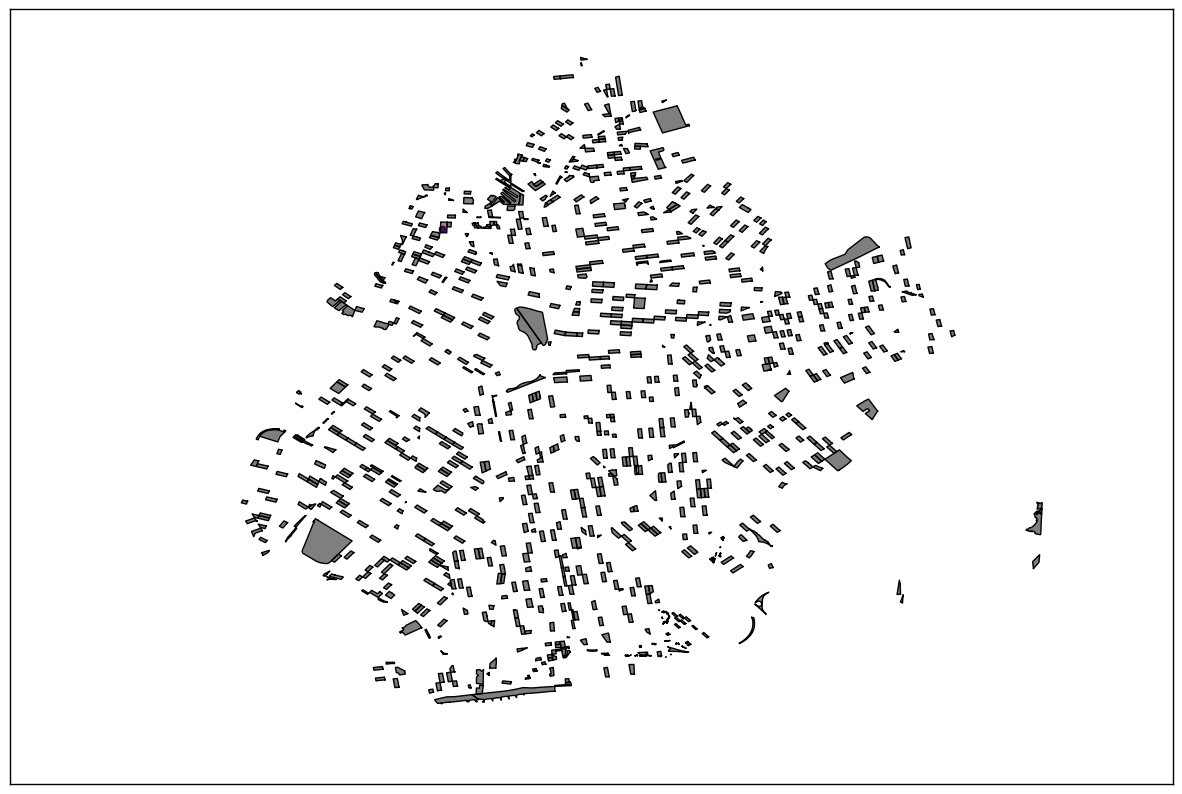

In [6]:
f, ax = plt.subplots(figsize=(15,10))
ct_latlon.iloc[arange(0, len(ct_latlon), 10),:].plot(column = 'BoroName', ax = ax, cmap = 'gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_latlon[ct_latlon.cusp == 1].plot(column = 'cusp', ax = ax, cmap = 'RdGy')
pl.scatter(-73.9885917, 40.6932169, alpha = .9, c = 'blue')


Figure 1: This is a map of Brooklyn with every 10 Census tracts plotted. The small red tract in the top left contains CUSP which is located by the blue dot.